<a href="https://colab.research.google.com/github/sujataprasad01/DL-Face-Detection-and-Face-Recognition-using-Computer-Vision/blob/main/Face_Detection_and_Face_Recognition_using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python

In [3]:
import cv2

In [4]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=cea8af8bbb0c579a301b8ea07263ab6b1df3aa615d063c58513d30e730c8a792
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [5]:
!pip install tensorflow-gpu==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 69.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [6]:
# import os
# os.kill(os.getpid(), 9)

In [7]:
!nvidia-smi

Tue Jan 30 16:44:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
!apt-get update -y
!apt-get install -y nvidia-driver-470

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [665 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,398 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,327 kB]
Get:13 https://pp

In [9]:
!service jupyter-lab restart

jupyter-lab: unrecognized service


In [10]:
!pip install --upgrade dlib/

ERROR: Invalid requirement: 'dlib/'
Hint: It looks like a path. File 'dlib/' does not exist.


In [11]:
from imutils import paths
import face_recognition
import pickle
import os

In [12]:
imagePath=list(paths.list_images('/content/drive/MyDrive/Colab Notebooks/Images'))
kEncoding=[]
kNames=[]

In [13]:
imagePath

['/content/drive/MyDrive/Colab Notebooks/Images/download (1).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Images/grouping-1st-L-e1451909610614.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Images/images (1).jpeg']

In [14]:
for i in imagePath:
  print(i)

/content/drive/MyDrive/Colab Notebooks/Images/download (1).jpeg
/content/drive/MyDrive/Colab Notebooks/Images/grouping-1st-L-e1451909610614.jpg
/content/drive/MyDrive/Colab Notebooks/Images/images (1).jpeg


In [15]:
for (i, ip) in enumerate(imagePath):
  print(i, ip)

0 /content/drive/MyDrive/Colab Notebooks/Images/download (1).jpeg
1 /content/drive/MyDrive/Colab Notebooks/Images/grouping-1st-L-e1451909610614.jpg
2 /content/drive/MyDrive/Colab Notebooks/Images/images (1).jpeg


In [16]:
arr=''
for (i, ip) in enumerate(imagePath):
  arr=ip.split(os.path.sep)

In [17]:
arr

['',
 'content',
 'drive',
 'MyDrive',
 'Colab Notebooks',
 'Images',
 'images (1).jpeg']

In [18]:
arr=''
image=''
for (i, ip) in enumerate(imagePath):
  arr=ip.split(os.path.sep)
  image=cv2.imread(ip)  # Convert to matrix


In [19]:
image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [223, 253, 255],
        [223, 253, 255],
        [223, 253, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [223, 253, 255],
        [223, 253, 255],
        [223, 253, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [223, 253, 255],
        [223, 253, 255],
        [223, 253, 255]],

       ...,

       [[128, 124, 123],
        [140, 136, 135],
        [159, 155, 154],
        ...,
        [233, 239, 244],
        [233, 239, 244],
        [233, 239, 244]],

       [[140, 136, 135],
        [145, 141, 140],
        [159, 155, 154],
        ...,
        [225, 231, 236],
        [225, 231, 236],
        [225, 231, 236]],

       [[153, 149, 148],
        [151, 147, 146],
        [162, 158, 157],
        ...,
        [154, 160, 165],
        [154, 160, 165],
        [154, 160, 165]]

In [20]:
image.ndim

3

In [21]:
image.shape

(183, 275, 3)

In [22]:
from google.colab.patches import cv2_imshow

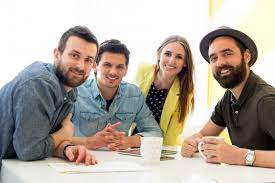

In [23]:
cv2_imshow(image)

In [24]:
rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [25]:
rgb

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 253, 223],
        [255, 253, 223],
        [255, 253, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 253, 223],
        [255, 253, 223],
        [255, 253, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 253, 223],
        [255, 253, 223],
        [255, 253, 223]],

       ...,

       [[123, 124, 128],
        [135, 136, 140],
        [154, 155, 159],
        ...,
        [244, 239, 233],
        [244, 239, 233],
        [244, 239, 233]],

       [[135, 136, 140],
        [140, 141, 145],
        [154, 155, 159],
        ...,
        [236, 231, 225],
        [236, 231, 225],
        [236, 231, 225]],

       [[148, 149, 153],
        [146, 147, 151],
        [157, 158, 162],
        ...,
        [165, 160, 154],
        [165, 160, 154],
        [165, 160, 154]]

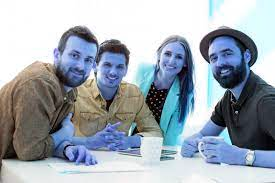

In [26]:
cv2_imshow(rgb)

In [28]:
for (i, ip) in enumerate(imagePath):
  name=ip.split(os.path.sep)
  image=cv2.imread(ip)
  rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  boxes=face_recognition.face_locations(rgb, model='hog')
  encodings=face_recognition.face_encodings(rgb, boxes)

  for encoding in encodings:
   kEncoding.append(encoding)
   kNames.append(name)

In [29]:
boxes=face_recognition.face_locations(rgb, model='hog')

In [30]:
boxes

[(41, 242, 84, 199), (54, 129, 90, 93), (46, 97, 82, 61)]

In [31]:
encodings=face_recognition.face_encodings(rgb, boxes)

In [32]:
encodings

[array([-0.05171066,  0.06255855,  0.0412858 , -0.05118337, -0.0862413 ,
         0.02724059, -0.0017629 , -0.01623567,  0.13823995, -0.02747776,
         0.14972259, -0.01918339, -0.22576591, -0.03069629, -0.04981806,
         0.12168886, -0.1341866 , -0.09064779, -0.09929976, -0.09091337,
         0.02394949,  0.08450802, -0.00051897,  0.0436819 , -0.14160472,
        -0.35366359, -0.07026476, -0.14154568, -0.05301974, -0.13575894,
         0.06810927,  0.02895708, -0.15572636, -0.0835979 ,  0.03448718,
        -0.02438104, -0.05472612, -0.07734144,  0.16047856,  0.09370148,
        -0.0894247 ,  0.01559323,  0.10836263,  0.33259118,  0.15516825,
         0.05318536,  0.01341052,  0.02166614,  0.11934617, -0.36119235,
         0.0640718 ,  0.10146614,  0.01188971,  0.08362856,  0.17659447,
        -0.10988302,  0.0080944 ,  0.0287698 , -0.1518437 ,  0.11399301,
         0.03918418,  0.0741426 , -0.0511421 , -0.06270901,  0.12000746,
         0.11388886, -0.080398  , -0.08079635,  0.0

In [33]:
len(kEncoding)

13

In [34]:
len(kNames)

13

In [35]:
kNames

[['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'download (1).jpeg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'grouping-1st-L-e1451909610614.jpg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'grouping-1st-L-e1451909610614.jpg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab Notebooks',
  'Images',
  'grouping-1st-L-e1451909610614.jpg'],
 ['',
  'content',
  'drive',
  'MyDrive',
  'Colab 

In [36]:
kEncoding

[array([-0.15386255,  0.06138266,  0.02217812, -0.11417028, -0.13204932,
        -0.05349524, -0.04888239, -0.11291449,  0.16331363, -0.04676328,
         0.20884582, -0.11122577, -0.26394725, -0.07679623, -0.08538181,
         0.13267571, -0.23483668, -0.10210789, -0.02133947, -0.11116083,
         0.04338705, -0.0776052 ,  0.09275655,  0.19752531, -0.20510575,
        -0.37737167, -0.09574664, -0.14050812, -0.06258047, -0.12425564,
         0.06862816,  0.03766774, -0.22842464, -0.03243969, -0.00866319,
         0.1377385 ,  0.02568196, -0.10681824,  0.11273752, -0.05161344,
        -0.19520485, -0.10207027,  0.14154616,  0.21452031,  0.22893417,
        -0.01562382,  0.03923516, -0.01686627,  0.16235308, -0.20469959,
        -0.01940421,  0.17328356,  0.05006926, -0.03858192,  0.07693829,
        -0.10169259,  0.02660054,  0.14944097, -0.16171047, -0.02924445,
         0.04806157, -0.00125958, -0.05846142, -0.02826269,  0.20415846,
         0.11486377, -0.16157699, -0.20126598,  0.2

# Another method

In [43]:
def read_img(imagePath):
  img=cv2.imread(i)
  (h,w)=img.shape[:2]
  width=500  ## hard coding width
  ratio=width/float(w) # preparing a ratio for height
  height=int(h*ratio) # generating new height
  return cv2.resize(img,(width, height)) # return the reshaped image

In [38]:
(h,w)

(183, 275)

In [39]:
width

500

In [40]:
height

332

In [41]:
print(height, width)

332 500


In [44]:
known_encoding=[]
known_names=[]
known_dir='/content/drive/MyDrive/Colab Notebooks/Images'  ## Know directory path
for file in os.listdir(known_dir):
  img=read_img(known_dir + '/' + file) ## reading all the images
  img_enc=face_recognition.face_encodings(img)[0] ## face encodings

  known_encoding.append(img_enc)
  known_names.append(file.split('.')[0])

print(known_names)  ## printing all the known kabels

['download (1)', 'grouping-1st-L-e1451909610614', 'images (1)']


Processing download (1).jpeg
[0. 0. 0.]
download (1)


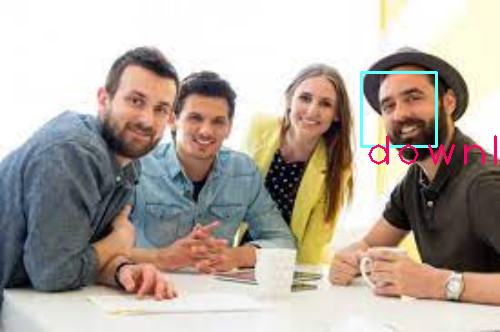

Processing grouping-1st-L-e1451909610614.jpg
[0. 0. 0.]
download (1)


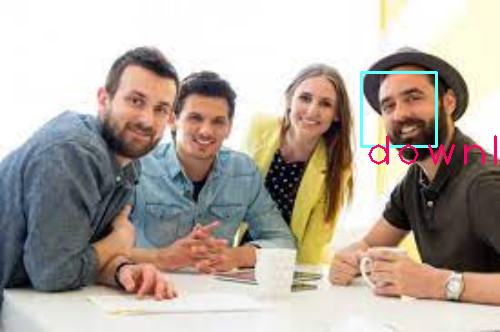

Processing images (1).jpeg
[0. 0. 0.]
download (1)


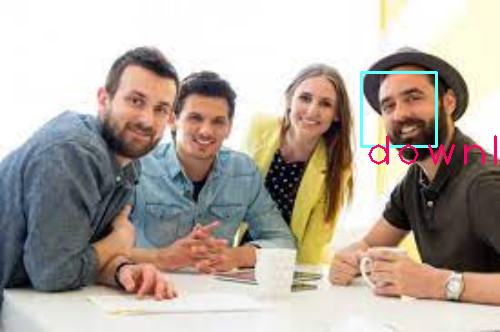

In [48]:
unknown_dir = '/content/drive/MyDrive/Colab Notebooks/Images' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encoding,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encoding,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 print(name)

 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images